### IMPORTING LIBRARIES AND DATASETS:

In [27]:
# Importing all the required libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [28]:
# reading the dataset TRAIN
train = pd.read_csv("train.csv")

### GETTING INSIGHTS ON DATA:

In [29]:
# about the train dataset

# dimensions
print("Dimensions: ", train.shape, "\n")

# data types
print(train.info())

# head
train.head()

Dimensions:  (42000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Looking at the % of data that has null values: TRAIN DATASET
round(100*(train.isnull().sum()/len(train.index)), 2).sort_values(ascending=False)

pixel783    0.0
pixel267    0.0
pixel265    0.0
pixel264    0.0
pixel263    0.0
pixel262    0.0
pixel261    0.0
pixel260    0.0
pixel259    0.0
pixel258    0.0
pixel257    0.0
pixel256    0.0
pixel255    0.0
pixel254    0.0
pixel253    0.0
pixel252    0.0
pixel251    0.0
pixel250    0.0
pixel249    0.0
pixel248    0.0
pixel247    0.0
pixel246    0.0
pixel245    0.0
pixel266    0.0
pixel268    0.0
pixel390    0.0
pixel269    0.0
pixel290    0.0
pixel289    0.0
pixel288    0.0
           ... 
pixel495    0.0
pixel494    0.0
pixel493    0.0
pixel492    0.0
pixel491    0.0
pixel512    0.0
pixel513    0.0
pixel514    0.0
pixel526    0.0
pixel535    0.0
pixel534    0.0
pixel533    0.0
pixel532    0.0
pixel531    0.0
pixel530    0.0
pixel529    0.0
pixel528    0.0
pixel527    0.0
pixel525    0.0
pixel515    0.0
pixel524    0.0
pixel523    0.0
pixel522    0.0
pixel521    0.0
pixel520    0.0
pixel519    0.0
pixel518    0.0
pixel517    0.0
pixel516    0.0
label       0.0
Length: 785, dtype: floa

As we can see from the above results, data is clean with all the columns free of NA values. 

In [31]:
# Basic statistical details: train
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


### EXPLORATORY DATA ANALYSIS:

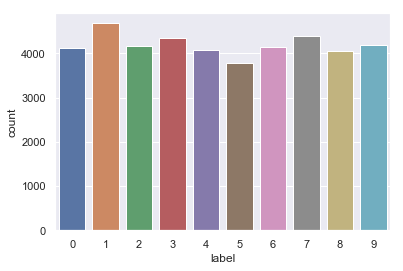

In [32]:
# Countplot of labels (count of numbers)
sns.set(style="darkgrid")
ax = sns.countplot(x="label", data=train)

In [33]:
# Dataset grouped by label and obtained mean
num_mean = train.groupby('label').mean()
num_mean

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.846626,0.939105,0.397182,0.086344,0.118155,0.027267,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


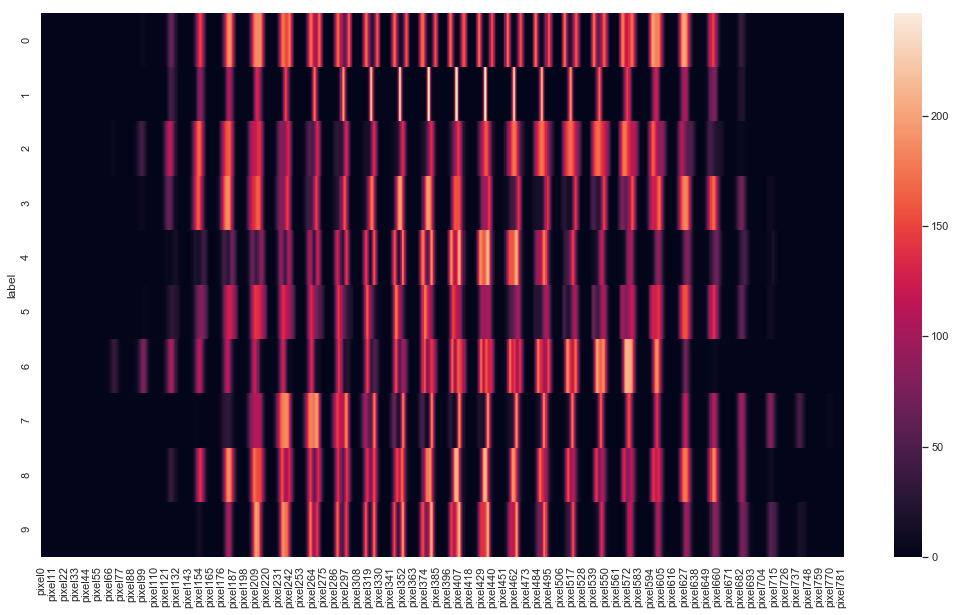

In [34]:
# Heatmap to check the correlated features
plt.figure(figsize=(18, 10))
sns.heatmap(num_mean)

Heatmap obtained is very cluttered. it is not possible to get any insights from this. We will proceed with data preparation. 

### DATA PREPARATION:

Let's conduct some data preparation steps before modeling. Firstly, let's see if it is important to **rescale** the features, since they may have varying ranges. For example, here are the average values:

In [35]:
# average feature values
round(train.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.01
pixel14     0.01
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.01
pixel762    0.04
pixel763    0.08
pixel764    0.11
pixel765    0.18
pixel766    0.30
pixel767    0.41
pixel768    0.51
pixel769    0.56
pixel770    0.68
pixel771    0.60
pixel772    0.49
pixel773    0.34
pixel774    0.22
pixel775    0.12
pixel776    0.06
pixel777    0.02
pixel778    0.02
pixel779    0.00
pixel780    0.00
pixel781    0.

In this case, the average values do not vary a lot (e.g. having a diff of an order of magnitude). Nevertheless, it is better to rescale them.

### SCALING IN SPPLITTING TRAIN DATA:

In [36]:
# splitting into X and y
X = train.drop("label", axis = 1)
y = train['label']

In [37]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.8, random_state = 101)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


### MODEL BUILDING:

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [38]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [39]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.913125 

[[3188    0   10    5   11   20   32    3   15    1]
 [   0 3677   14   11    5    7    4    8   30    4]
 [  36   29 3027   54   55   10   30   42   48   12]
 [  13   12  104 3051    9  181    5   21   54   25]
 [   8   14   33    2 3057    4   25   31    6  110]
 [  30   23   29  136   44 2622   44   12   72   27]
 [  26   11   44    4   28   33 3113    0   18    0]
 [   7   24   36   19   59    9    2 3210    4  134]
 [  13   46   50  120   21  110   30   18 2843   21]
 [  19   17   21   22  172   20    4  161   26 2893]]


In [40]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [41]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9396428571428571 

[[3195    0   19    5    4   11   32    4   14    1]
 [   0 3689   23   12    8    3    7    6    8    4]
 [  15   15 3144   29   31    5   18   37   43    6]
 [   5    8   92 3191    5   73    6   31   43   21]
 [   3    7   57    1 3099    9   19   21    7   67]
 [  15   10   37   66   16 2776   53   15   32   19]
 [  19    5   46    1   12   31 3149    2   12    0]
 [   6   21   66   11   25    3    0 3285    3   84]
 [  14   24   40   63   14   62   22   19 2996   18]
 [  12   10   38   40   80    6    0   97   24 3048]]


The non-linear model gives approx. 94% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

### GRID SEARCH: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [42]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 70.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [43]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,234.924563,2.180772,27.806618,1.870799,1,0.01,"{'C': 1, 'gamma': 0.01}",0.752381,0.750595,0.747024,...,0.741310,0.010784,12,1.000000,0.999851,0.999851,1.000000,1.000000,0.999940,0.000073
1,59.129001,0.910553,16.092491,0.282353,1,0.001,"{'C': 1, 'gamma': 0.001}",0.935119,0.926786,0.935119,...,0.930833,0.004216,4,0.972321,0.971429,0.971429,0.972173,0.973214,0.972113,0.000663
2,77.682917,3.638614,18.920136,0.205605,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.910119,0.905952,0.907738,...,0.903095,0.006075,8,0.916518,0.917708,0.916518,0.921577,0.919940,0.918452,0.002001
3,218.592820,0.869783,24.589599,0.395030,10,0.01,"{'C': 10, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,45.202484,0.646491,12.939950,0.375294,10,0.001,"{'C': 10, 'gamma': 0.001}",0.941071,0.938690,0.945833,...,0.939405,0.003865,1,0.999405,0.999554,0.999405,0.999107,0.999256,0.999345,0.000152
5,34.536708,0.619263,11.845884,0.061701,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.933929,0.923214,0.931548,...,0.927262,0.004678,5,0.957887,0.959970,0.959375,0.957738,0.959077,0.958810,0.000865
6,221.372952,3.153324,24.927372,1.223983,100,0.01,"{'C': 100, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,44.655901,0.414536,12.681431,0.212427,100,0.001,"{'C': 100, 'gamma': 0.001}",0.939881,0.936905,0.946429,...,0.939286,0.003783,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,26.038603,0.356509,9.569813,0.190898,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.929762,0.923810,0.925595,...,0.925595,0.003409,6,0.994345,0.994494,0.994940,0.993006,0.994196,0.994196,0.000645
9,487.811291,538.559660,24.359225,0.146161,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


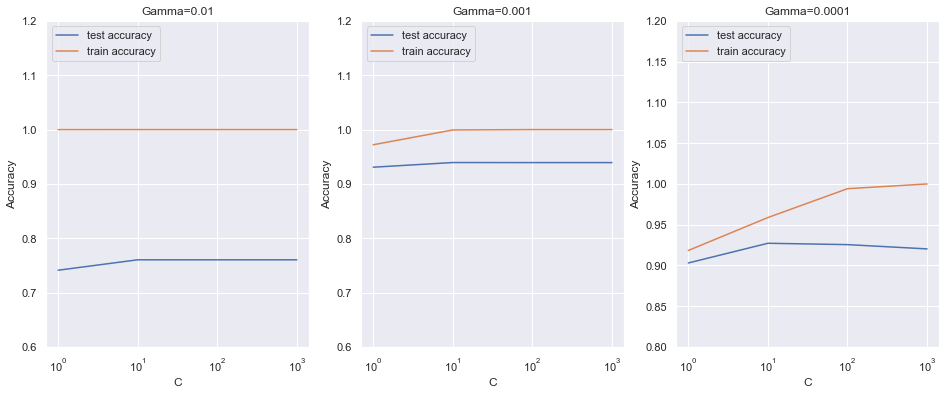

In [44]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [45]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9394047619047619 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [46]:
# model with optimal hyperparameters (C=10, gamma=0.001)

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9477083333333334 

[[3211    0   19    2    2   12   26    3    8    2]
 [   0 3692   26    9    6    3    5    9    7    3]
 [  13   12 3165   29   29    6   20   40   21    8]
 [   4    5   77 3232    4   79    1   23   31   19]
 [   5    8   42    1 3117    5   20   19    9   64]
 [  15    8   33   61   15 2815   35   11   31   15]
 [  19    5   44    1   12   18 3167    1   10    0]
 [   5   17   52   12   29    4    1 3322    4   58]
 [   7   16   42   53   15   51   18   16 3044   10]
 [   9    9   33   20   81   10    0   94   21 3078]] 



### CONCLUSION:

The accuracy achieved using a non-linear kernel (~95%) is mush higher than that of a linear one (~91%). We can conclude that the problem is highly non-linear in nature.

In [50]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels

In [51]:
print('\nClassification report:\n', classification_report(y_test, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3285
           1       0.98      0.98      0.98      3760
           2       0.90      0.95      0.92      3343
           3       0.95      0.93      0.94      3475
           4       0.94      0.95      0.94      3290
           5       0.94      0.93      0.93      3039
           6       0.96      0.97      0.96      3277
           7       0.94      0.95      0.94      3504
           8       0.96      0.93      0.94      3272
           9       0.95      0.92      0.93      3355

   micro avg       0.95      0.95      0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600



From Classification_Report it can be observed that 'precison', 'recall', 'f1-score', 'support' for all ten classes (labels) are more or less similar. This shows that results are not skewed. The developed model here can correctly identify the digits written in an image with an accuracy of about ~95%.